# Problem Statement: 
- Help company(delhivery) to understand and process the data coming out of data engineering pipelines.

- Clean, sanitize and manipulate data to get useful features out of raw fields.

- Make sense out of the raw data and help the data science team to build forecasting models on it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from dateutil import parser
import statsmodels.api as sm
from statsmodels.stats import weightstats
from scipy import  stats
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/anura/Microsoft/PROJECT_X/5_Delhivery - Feature Engineering/delhivery_data.csv')
data.head(10).T

,0,1,2,3,4,5,6,7,8,9
data,training,training,training,training,training,training,training,training,training,training
trip_creation_time,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840,2018-09-20 02:35:36.476840
route_schedule_uuid,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...
route_type,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting,Carting
trip_uuid,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320,trip-153741093647649320
source_center,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388121AAA,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB
source_name,Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Anand_VUNagar_DC (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat)
destination_center,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388620AAB,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA,IND388320AAA
destination_name,Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Khambhat_MotvdDPP_D (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat),Anand_Vaghasi_IP (Gujarat)
od_start_time,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797,2018-09-20 04:47:45.236797


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [4]:
# Dropping Irrelevant columns
data = data.drop(['data','is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'factor','segment_factor'], axis= 1)
data.head(10)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153
5,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,10.403038,15.0,11.0,12.1171,15.0,11.0,12.1171
6,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,18.045481,44.0,17.0,21.2890,28.0,6.0,9.1719
7,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,28.061896,65.0,29.0,35.8252,21.0,11.0,14.5362
8,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,38.939167,76.0,39.0,47.1900,10.0,10.0,11.3648
9,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45.236797,2018-09-20 06:36:55.627764,109.0,43.595802,102.0,45.0,53.2334,26.0,6.0,6.0434


In [5]:
# % of NULL values
np.round(data.isnull().sum() / len(data)*100,2)

trip_creation_time                0.00
route_schedule_uuid               0.00
route_type                        0.00
trip_uuid                         0.00
source_center                     0.00
source_name                       0.20
destination_center                0.00
destination_name                  0.18
od_start_time                     0.00
od_end_time                       0.00
start_scan_to_end_scan            0.00
actual_distance_to_destination    0.00
actual_time                       0.00
osrm_time                         0.00
osrm_distance                     0.00
segment_actual_time               0.00
segment_osrm_time                 0.00
segment_osrm_distance             0.00
dtype: float64

In [6]:
data.shape

(144867, 18)

# Handle missing values

In [7]:
# Removing the missing rows since it is very less.
data = data[data.isnull().T.sum() == 0]
print(data.shape)
# % value removed 
(144867 - data.shape[0])/144867*100

(144316, 18)


0.380348871723719

In [8]:
# Converting Date-Time columns
data[['trip_creation_time','od_start_time','od_end_time']] = data[['trip_creation_time', 'od_start_time','od_end_time']].astype('datetime64')

In [9]:
# Number of unique value in data
for i in data.columns:
    print(i,'is : ',data[i].nunique())

trip_creation_time is :  14787
route_schedule_uuid is :  1497
route_type is :  2
trip_uuid is :  14787
source_center is :  1496
source_name is :  1496
destination_center is :  1466
destination_name is :  1466
od_start_time is :  26223
od_end_time is :  26223
start_scan_to_end_scan is :  1914
actual_distance_to_destination is :  143965
actual_time is :  3182
osrm_time is :  1531
osrm_distance is :  137544
segment_actual_time is :  746
segment_osrm_time is :  214
segment_osrm_distance is :  113497


In [10]:
# Unique values in categorical columns
cat_columns = ['route_type']
for i in cat_columns:
    print(data[i].value_counts())

FTL        99132
Carting    45184
Name: route_type, dtype: int64


In [11]:
# Converting route_type to categorical type
data[['route_type']] = data[['route_type']].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144316 entries, 0 to 144866
Data columns (total 18 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   trip_creation_time              144316 non-null  datetime64[ns]
 1   route_schedule_uuid             144316 non-null  object        
 2   route_type                      144316 non-null  category      
 3   trip_uuid                       144316 non-null  object        
 4   source_center                   144316 non-null  object        
 5   source_name                     144316 non-null  object        
 6   destination_center              144316 non-null  object        
 7   destination_name                144316 non-null  object        
 8   od_start_time                   144316 non-null  datetime64[ns]
 9   od_end_time                     144316 non-null  datetime64[ns]
 10  start_scan_to_end_scan          144316 non-null  float64

# Outlier Detection & Handling

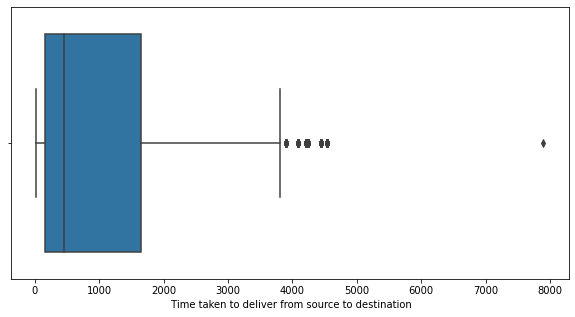

In [13]:
plt.figure(figsize= (10,5))
sns.boxplot(data['start_scan_to_end_scan'])
plt.xlabel(' Time taken to deliver from source to destination')
plt.show()

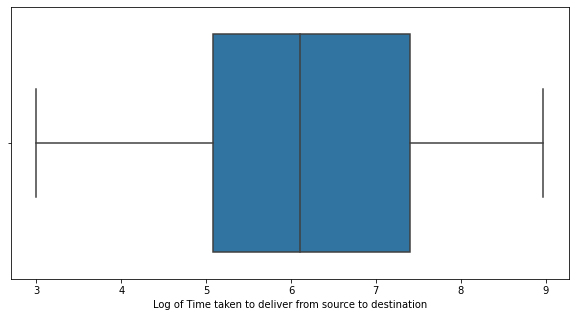

In [14]:
plt.figure(figsize= (10,5))
sns.boxplot(np.log(data['start_scan_to_end_scan']))
plt.xlabel('Log of Time taken to deliver from source to destination')
plt.show()

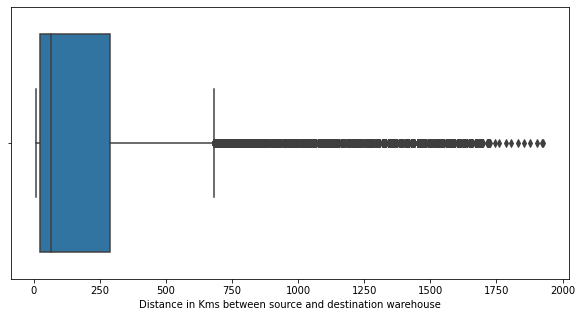

In [15]:
plt.figure(figsize= (10,5))
sns.boxplot(data['actual_distance_to_destination'])
plt.xlabel('Distance in Kms between source and destination warehouse')
plt.show()

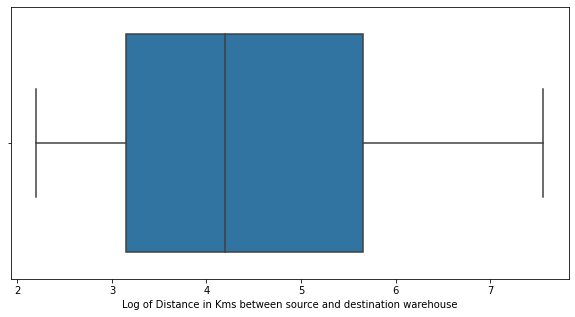

In [16]:
plt.figure(figsize= (10,5))
sns.boxplot(np.log(data['actual_distance_to_destination']))
plt.xlabel('Log of Distance in Kms between source and destination warehouse')
plt.show()

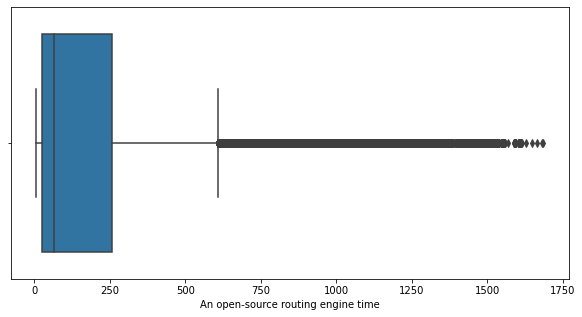

In [17]:
plt.figure(figsize= (10,5))
sns.boxplot(data['osrm_time'])
plt.xlabel('An open-source routing engine time')
plt.show()

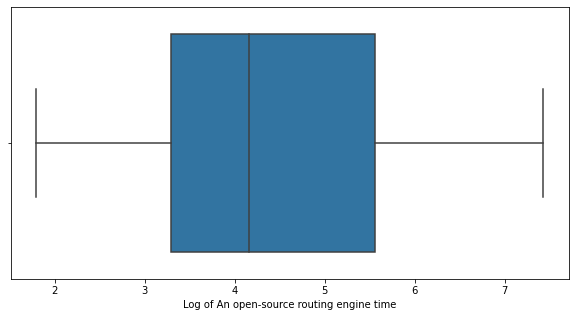

In [18]:
plt.figure(figsize= (10,5))
sns.boxplot(np.log(data['osrm_time']))
plt.xlabel('Log of An open-source routing engine time')
plt.show()

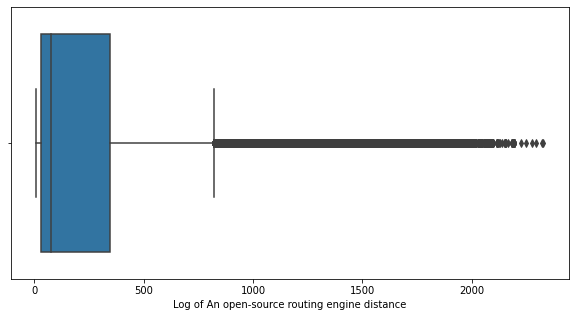

In [19]:
plt.figure(figsize= (10,5))
sns.boxplot(data['osrm_distance'])
plt.xlabel('Log of An open-source routing engine distance')
plt.show()

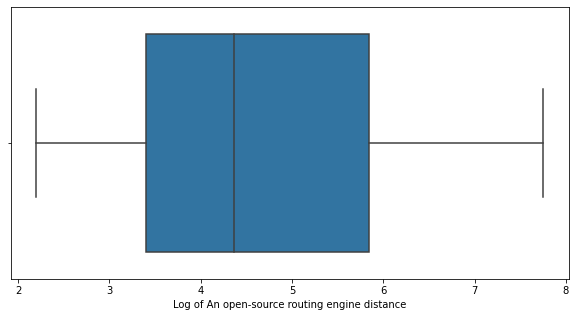

In [20]:
plt.figure(figsize= (10,5))
sns.boxplot(np.log(data['osrm_distance']))
plt.xlabel('Log of An open-source routing engine distance')
plt.show()

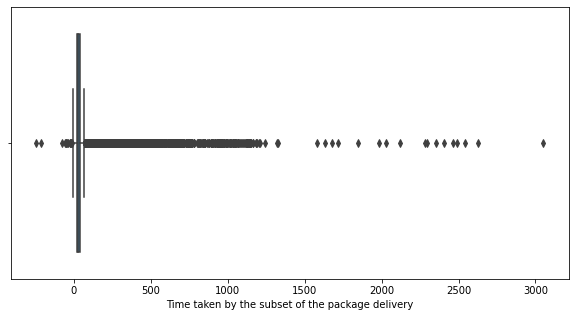

In [21]:
plt.figure(figsize= (10,5))
sns.boxplot(data['segment_actual_time'])
plt.xlabel('Time taken by the subset of the package delivery')
plt.show()

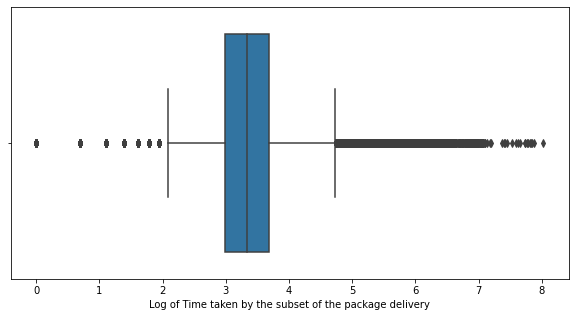

In [22]:
plt.figure(figsize= (10,5))
sns.boxplot(np.log(data['segment_actual_time']))
plt.xlabel('Log of Time taken by the subset of the package delivery')
plt.show()

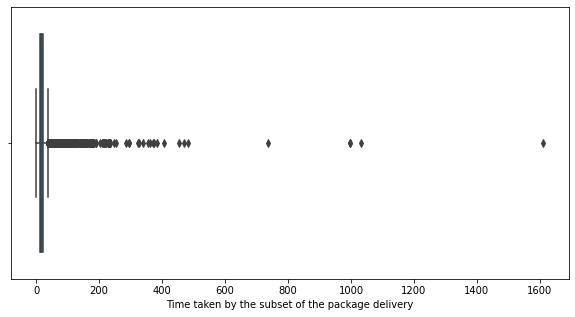

In [23]:
plt.figure(figsize= (10,5))
sns.boxplot(data['segment_osrm_time'])
plt.xlabel('Time taken by the subset of the package delivery')
plt.show()

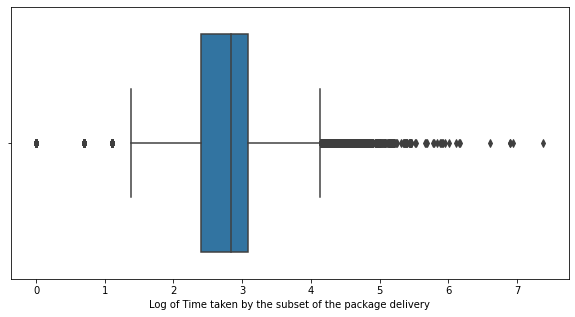

In [24]:
plt.figure(figsize= (10,5))
sns.boxplot(np.log(data['segment_osrm_time']))
plt.xlabel('Log of Time taken by the subset of the package delivery')
plt.show()

## Outlier Treatment

In [25]:
q_25 = np.percentile(data['start_scan_to_end_scan'], 25)
q_75 = np.percentile(data['start_scan_to_end_scan'], 75)
iqr = (q_75 - q_25)
upperbound = q_75 + 1.5*iqr
lowerbound = q_25 - 1.5*iqr
data_start_scan_to_end_scan = data[(data['start_scan_to_end_scan']>= lowerbound) & (data['start_scan_to_end_scan']<= upperbound)]

### % data lost in outlier removal

In [26]:

(len(data)-len(data_start_scan_to_end_scan))/len(data)*100

0.2584606003492336

- Since we are dealing with time and distance, I am not removing the outlier.
 - There can be some destinations which are far from the source, but it doesn't mean they are outliers.
  - If I remove the outliers, it will change the source and destination of trips and It will alter my analysis. 

# Grouping the trip, source and destination.
## Frequency vs Time taken to deliver from source to destination.

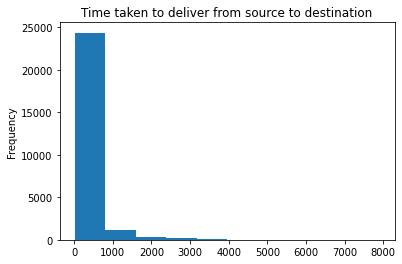

In [27]:

data.groupby(['trip_uuid','source_center', 'destination_center'])['start_scan_to_end_scan'].max().plot(kind = 'hist', 
xlabel = 'Time taken to deliver from source to destination', ylabel = 'frequency ', title = 'Time taken to deliver from source to destination')

plt.show()

In [28]:
data.groupby(['trip_uuid','source_center', 'destination_center']).agg({'start_scan_to_end_scan': ['count']})

start_scan_to_end_scan
                                                                          count
trip_uuid               source_center destination_center                       
trip-153671041653548748 IND209304AAA  IND000000ACB                           18
                        IND462022AAA  IND209304AAA                           21
trip-153671042288605164 IND561203AAB  IND562101AAA                            3
                        IND572101AAA  IND561203AAB                            6
trip-153671043369099517 IND000000ACB  IND160002AAC                           12
...                                                                         ...
trip-153861115439069069 IND628204AAA  IND627657AAA                            4
                        IND628613AAA  IND627005AAA                            4
                        IND628801AAA  IND628204AAA                            2
trip-153861118270144424 IND583119AAA  IND583101AAA                            2
                        IND583201AAA  IND583119AAA                            2

[26222 rows x 1 columns]

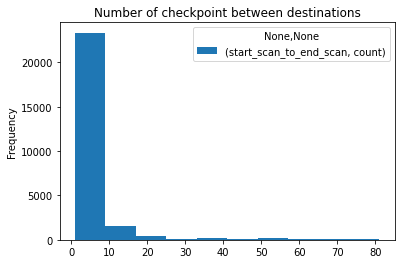

In [29]:

data.groupby(['trip_uuid','source_center', 'destination_center']).agg({'start_scan_to_end_scan': [ 'count']}).plot(kind = 'hist', 
xlabel = 'count of checkpoint', ylabel = 'frequency of number of check point', title = 'Number of checkpoint between destinations')

plt.show()

In [30]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_distance_to_destination'].max()

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          383.759164
                         IND462022AAA   IND209304AAA          440.973689
trip-153671042288605164  IND561203AAB   IND562101AAA           24.644021
                         IND572101AAA   IND561203AAB           48.542890
trip-153671043369099517  IND000000ACB   IND160002AAC          242.309306
                                                                 ...    
trip-153861115439069069  IND628204AAA   IND627657AAA           33.627182
                         IND628613AAA   IND627005AAA           33.673835
                         IND628801AAA   IND628204AAA           12.661945
trip-153861118270144424  IND583119AAA   IND583101AAA           40.546740
                         IND583201AAA   IND583119AAA           25.534793
Name: actual_distance_to_destination, Length: 26222, dtype: float64

### Distance in Kms between source and destination warehouse

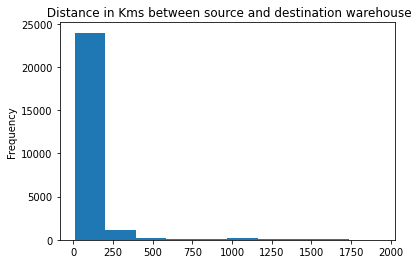

In [31]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_distance_to_destination'].max().plot(kind = 'hist', 
xlabel = ' Distance in Kms between source and destination warehouse', ylabel = 'frequency ', title = ' Distance in Kms between source and destination warehouse')

plt.show()

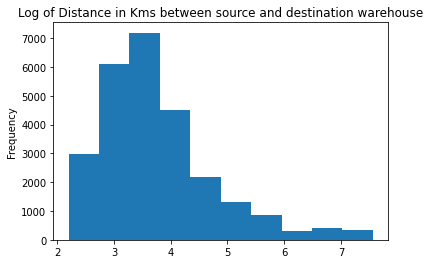

In [32]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_distance_to_destination'].max()).plot(kind = 'hist', 
xlabel = 'Log of Distance in Kms between source and destination warehouse', ylabel = 'frequency ', title = 'Log of Distance in Kms between source and destination warehouse')

plt.show()

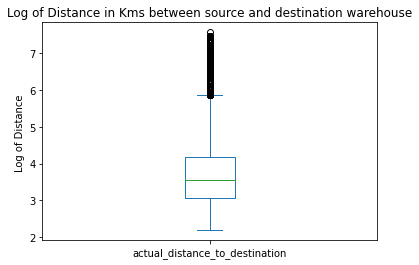

In [33]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_distance_to_destination'].max()).plot(kind= 'box',
ylabel = 'Log of Distance ', title = 'Log of Distance in Kms between source and destination warehouse')

plt.show()

### Actual_Time

In [34]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_time'].max().head(10)


trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB           732.0
                         IND462022AAA   IND209304AAA           830.0
trip-153671042288605164  IND561203AAB   IND562101AAA            47.0
                         IND572101AAA   IND561203AAB            96.0
trip-153671043369099517  IND000000ACB   IND160002AAC           611.0
                         IND562132AAA   IND000000ACB          2736.0
trip-153671046011330457  IND400072AAB   IND401104AAA            59.0
trip-153671052974046625  IND583101AAA   IND583201AAA           147.0
                         IND583119AAA   IND583101AAA           131.0
                         IND583201AAA   IND583119AAA            63.0
Name: actual_time, dtype: float64

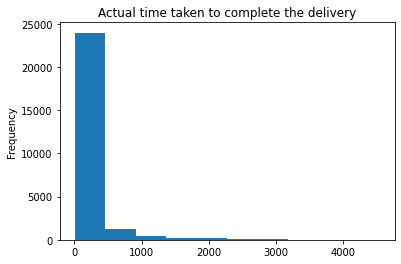

In [35]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_time'].max().plot(kind = 'hist', 
xlabel = 'Actual time taken to complete the delivery', ylabel = 'frequency ', title = 'Actual time taken to complete the delivery')

plt.show()

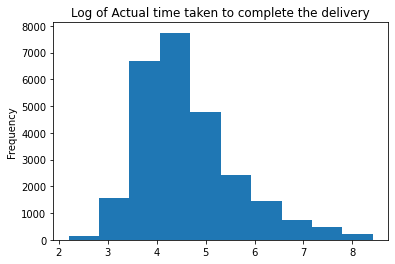

In [36]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_time'].max()).plot(kind = 'hist', 
xlabel = 'Log of Actual time taken to complete the delivery', ylabel = 'frequency ', title = 'Log of Actual time taken to complete the delivery')

plt.show()

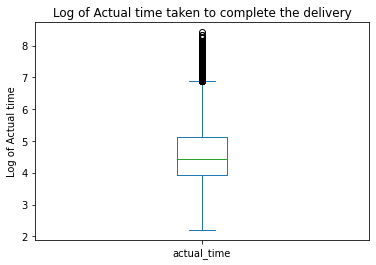

In [37]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_time'].max()).plot(kind = 'box', 
ylabel = 'Log of Actual time',  title = 'Log of Actual time taken to complete the delivery')

plt.show()

### An open-source routing engine time taken to complete the delivery

In [38]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_time'].max()

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          349.0
                         IND462022AAA   IND209304AAA          394.0
trip-153671042288605164  IND561203AAB   IND562101AAA           26.0
                         IND572101AAA   IND561203AAB           42.0
trip-153671043369099517  IND000000ACB   IND160002AAC          212.0
                                                              ...  
trip-153861115439069069  IND628204AAA   IND627657AAA           41.0
                         IND628613AAA   IND627005AAA           48.0
                         IND628801AAA   IND628204AAA           14.0
trip-153861118270144424  IND583119AAA   IND583101AAA           42.0
                         IND583201AAA   IND583119AAA           26.0
Name: osrm_time, Length: 26222, dtype: float64

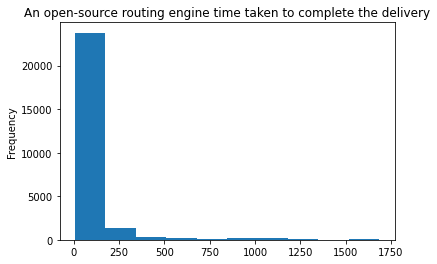

In [39]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_time'].max().plot(kind = 'hist', 
xlabel = 'An open-source routing engine time taken to complete the delivery', ylabel = 'frequency ', title = 'An open-source routing engine time taken to complete the delivery')

plt.show()

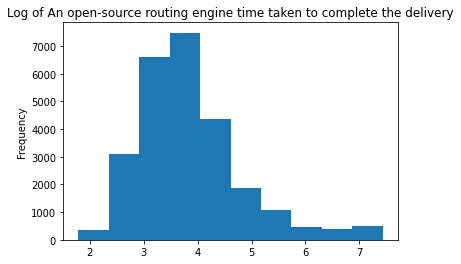

In [40]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_time'].max()).plot(kind = 'hist', 
xlabel = 'Log of An open-source routing engine time taken to complete the delivery', ylabel = 'frequency ', title = 'Log of An open-source routing engine time taken to complete the delivery')

plt.show()

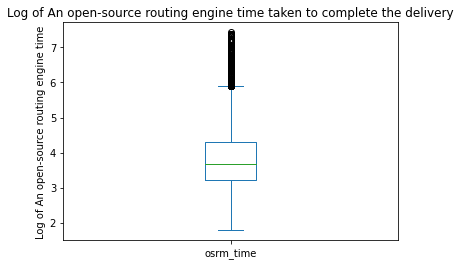

In [41]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_time'].max()).plot(kind = 'box', 
ylabel = 'Log of An open-source routing engine time',
title = 'Log of An open-source routing engine time taken to complete the delivery')

plt.show()

### An open-source routing engine Distance in Kms between source and destination 

In [42]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_distance'].max()

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          446.5496
                         IND462022AAA   IND209304AAA          544.8027
trip-153671042288605164  IND561203AAB   IND562101AAA           28.1994
                         IND572101AAA   IND561203AAB           56.9116
trip-153671043369099517  IND000000ACB   IND160002AAC          281.2109
                                                                ...   
trip-153861115439069069  IND628204AAA   IND627657AAA           42.5213
                         IND628613AAA   IND627005AAA           40.6080
                         IND628801AAA   IND628204AAA           16.0185
trip-153861118270144424  IND583119AAA   IND583101AAA           52.5303
                         IND583201AAA   IND583119AAA           28.0484
Name: osrm_distance, Length: 26222, dtype: float64

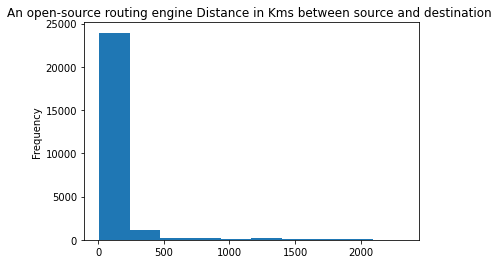

In [43]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_distance'].max().plot(kind = 'hist', 
xlabel = 'An open-source routing engine Distance in Kms between source and destination ', ylabel = 'frequency ',
 title = 'An open-source routing engine Distance in Kms between source and destination ')

plt.show()

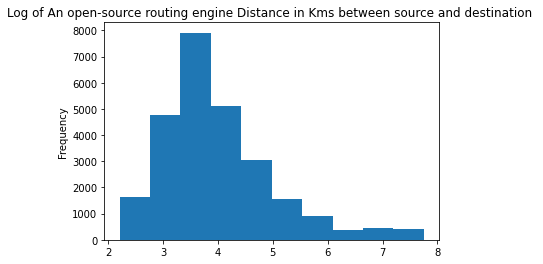

In [44]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_distance'].max()).plot(kind = 'hist', 
xlabel = 'Log of An open-source routing engine Distance in Kms between source and destination ', ylabel = 'frequency ',
 title = 'Log of An open-source routing engine Distance in Kms between source and destination ')

plt.show()

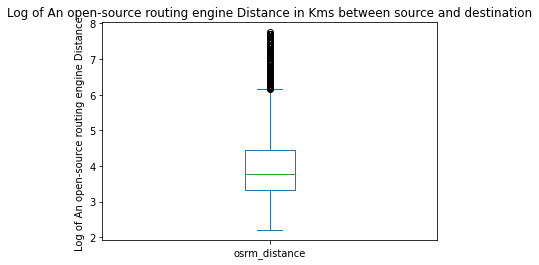

In [45]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['osrm_distance'].max()).plot(kind = 'box', 
ylabel = 'Log of An open-source routing engine Distance ', 
 title = 'Log of An open-source routing engine Distance in Kms between source and destination')

plt.show()

### Time taken between CHECKPOINTS for package delivery

In [46]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_actual_time'].sum()

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          728.0
                         IND462022AAA   IND209304AAA          820.0
trip-153671042288605164  IND561203AAB   IND562101AAA           46.0
                         IND572101AAA   IND561203AAB           95.0
trip-153671043369099517  IND000000ACB   IND160002AAC          608.0
                                                              ...  
trip-153861115439069069  IND628204AAA   IND627657AAA           49.0
                         IND628613AAA   IND627005AAA           89.0
                         IND628801AAA   IND628204AAA           29.0
trip-153861118270144424  IND583119AAA   IND583101AAA          233.0
                         IND583201AAA   IND583119AAA           41.0
Name: segment_actual_time, Length: 26222, dtype: float64

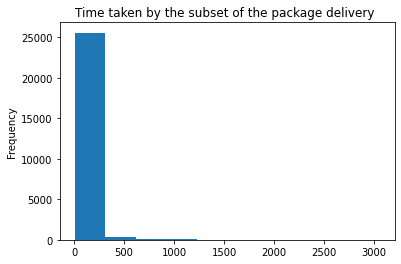

In [47]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_actual_time'].max().plot(kind = 'hist', 
xlabel = 'Time taken by the subset of the package delivery ', ylabel = 'frequency ',
 title = 'Time taken by the subset of the package delivery ')

plt.show()

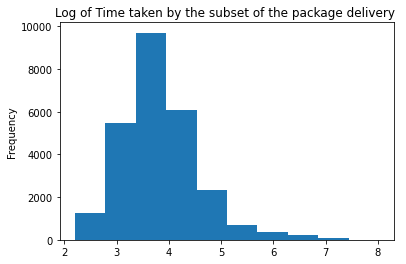

In [48]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_actual_time'].max()).plot(kind = 'hist', 
xlabel = 'Log of Time taken by the subset of the package delivery ', ylabel = 'frequency ',
 title = 'Log of Time taken by the subset of the package delivery ')

plt.show()

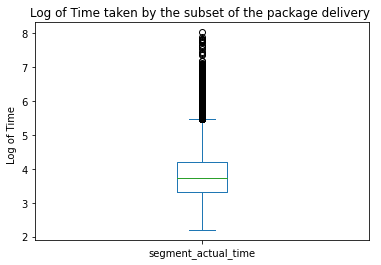

In [49]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_actual_time'].max()).plot(kind = 'box', 
ylabel = 'Log of Time  ', 
 title = 'Log of Time taken by the subset of the package delivery ')

plt.show()

In [50]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_time'].sum()

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          534.0
                         IND462022AAA   IND209304AAA          474.0
trip-153671042288605164  IND561203AAB   IND562101AAA           26.0
                         IND572101AAA   IND561203AAB           39.0
trip-153671043369099517  IND000000ACB   IND160002AAC          231.0
                                                              ...  
trip-153861115439069069  IND628204AAA   IND627657AAA           42.0
                         IND628613AAA   IND627005AAA           77.0
                         IND628801AAA   IND628204AAA           14.0
trip-153861118270144424  IND583119AAA   IND583101AAA           42.0
                         IND583201AAA   IND583119AAA           25.0
Name: segment_osrm_time, Length: 26222, dtype: float64

### OSRM Time taken by the segment of the package delivery

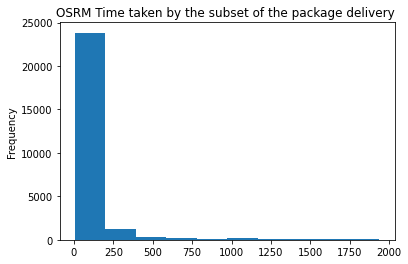

In [51]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_time'].sum().plot(kind = 'hist', 
xlabel = 'OSRM Time taken by the subset of the package delivery ', ylabel = 'frequency ',
 title = 'OSRM Time taken by the subset of the package delivery ')

plt.show()

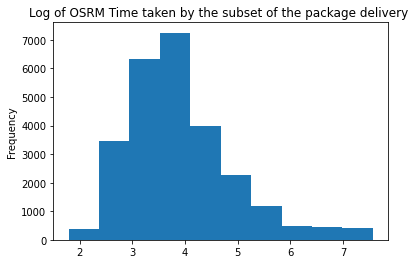

In [52]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_time'].sum()).plot(kind = 'hist', 
xlabel = 'Log of OSRM Time taken by the subset of the package delivery ', ylabel = 'frequency ',
 title = 'Log of OSRM Time taken by the subset of the package delivery ')

plt.show()

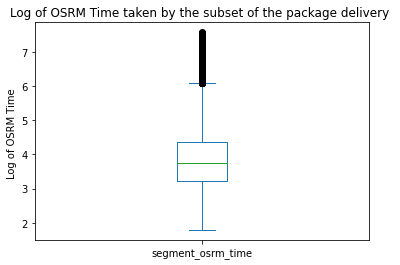

In [53]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_time'].sum()).plot(kind = 'box', 
ylabel = 'Log of OSRM Time ', 
 title = 'Log of OSRM Time taken by the subset of the package delivery ')

plt.show()

### OSRM Distance covered by subset of the package delivery 

In [54]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].sum()

trip_uuid                source_center  destination_center
trip-153671041653548748  IND209304AAA   IND000000ACB          670.6205
                         IND462022AAA   IND209304AAA          649.8528
trip-153671042288605164  IND561203AAB   IND562101AAA           28.1995
                         IND572101AAA   IND561203AAB           55.9899
trip-153671043369099517  IND000000ACB   IND160002AAC          317.7408
                                                                ...   
trip-153861115439069069  IND628204AAA   IND627657AAA           42.1431
                         IND628613AAA   IND627005AAA           78.5869
                         IND628801AAA   IND628204AAA           16.0184
trip-153861118270144424  IND583119AAA   IND583101AAA           52.5303
                         IND583201AAA   IND583119AAA           28.0484
Name: segment_osrm_distance, Length: 26222, dtype: float64

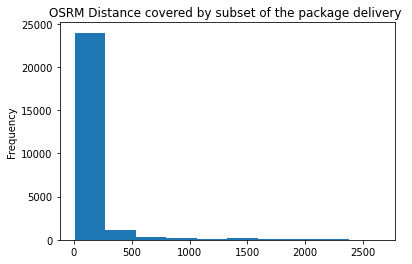

In [55]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].sum().plot(kind = 'hist', 
xlabel = 'OSRM Distance covered by subset of the package delivery ', ylabel = 'frequency ',
 title = 'OSRM Distance covered by subset of the package delivery ')

plt.show()

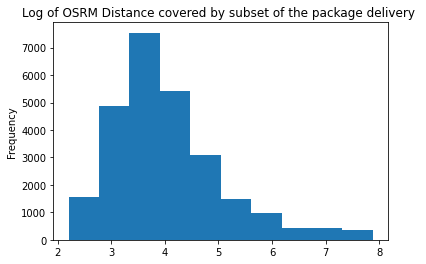

In [56]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].sum()).plot(kind = 'hist', 
xlabel = 'Log of OSRM Distance covered by subset of the package delivery ', ylabel = 'frequency ',
 title = 'Log of OSRM Distance covered by subset of the package delivery ')

plt.show()

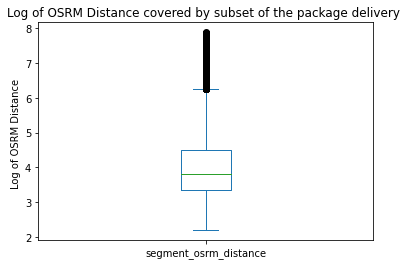

In [57]:
np.log(data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].sum()).plot(kind = 'box', 
ylabel = 'Log of OSRM Distance ',
 title = 'Log of OSRM Distance covered by subset of the package delivery ')

plt.show()

## Cumulative sum of various features.

In [58]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_actual_time'].cumsum()

0          14.0
1          24.0
2          40.0
3          61.0
4          67.0
          ...  
144862     92.0
144863    118.0
144864    138.0
144865    155.0
144866    423.0
Name: segment_actual_time, Length: 144316, dtype: float64

<AxesSubplot:ylabel='Frequency'>

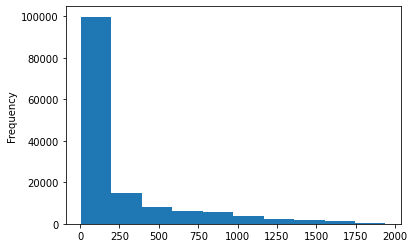

In [59]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_time'].cumsum().plot(kind = 'hist')

<AxesSubplot:>

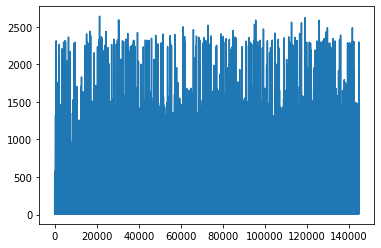

In [60]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].cumsum().plot(kind= 'line')

In [61]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].cumsum()

0          11.9653
1          21.7243
2          32.5395
3          45.5619
4          49.4772
            ...   
144862     65.3487
144863     82.7212
144864    103.4265
144865    122.3150
144866    131.1238
Name: segment_osrm_distance, Length: 144316, dtype: float64

In [62]:
data.groupby(['trip_uuid','source_center', 'destination_center'])['segment_osrm_distance'].cumsum()

0          11.9653
1          21.7243
2          32.5395
3          45.5619
4          49.4772
            ...   
144862     65.3487
144863     82.7212
144864    103.4265
144865    122.3150
144866    131.1238
Name: segment_osrm_distance, Length: 144316, dtype: float64

# Bivariate plots

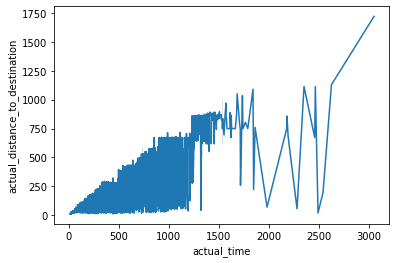

In [63]:
sns.lineplot(data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_time'].mean(), data.groupby(['trip_uuid','source_center', 'destination_center'])['actual_distance_to_destination'].mean())
plt.show()

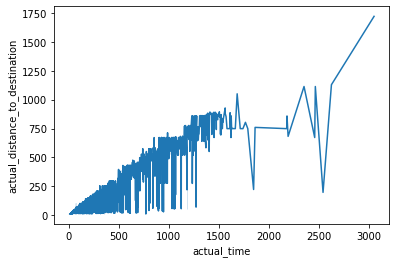

In [64]:
sns.lineplot(data.groupby(['trip_uuid'])['actual_time'].mean(), data.groupby(['trip_uuid'])['actual_distance_to_destination'].mean())
plt.show()

As distance increase time required also increses.

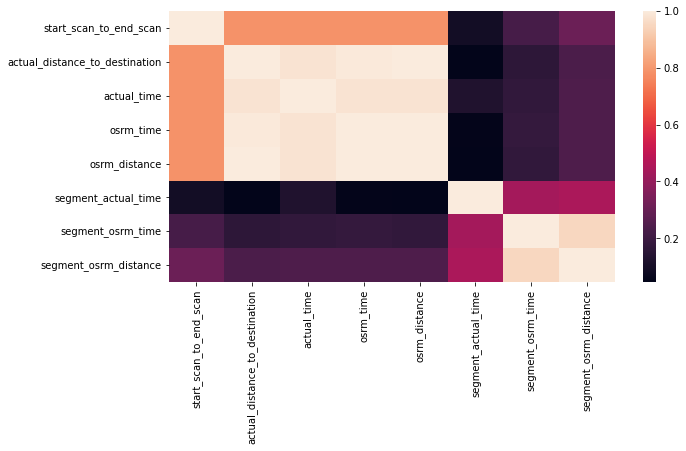

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr())
plt.show()

There is high correlation between distance and time.

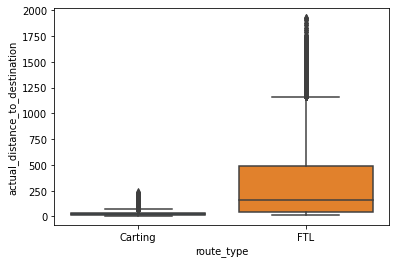

In [66]:
sns.boxplot(data['route_type'], data['actual_distance_to_destination'])
plt.show()

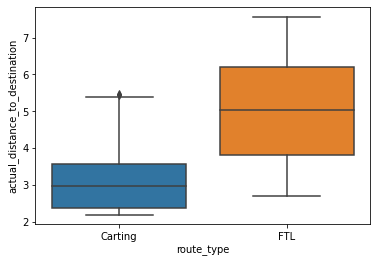

In [67]:
sns.boxplot(data['route_type'], np.log(data['actual_distance_to_destination']))
plt.show()

Median distance for FTL is significantly high as compared to Carting.

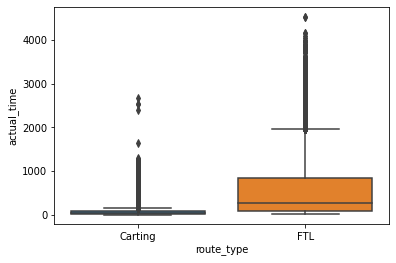

In [68]:
sns.boxplot(data['route_type'], data['actual_time'])
plt.show()

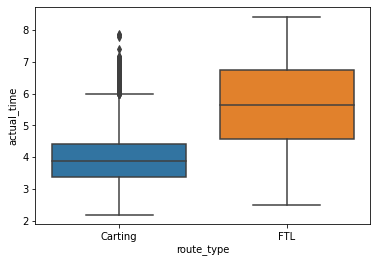

In [69]:
sns.boxplot(data['route_type'], np.log(data['actual_time']))
plt.show()

Median time for FTL is significantly high as compared to Carting

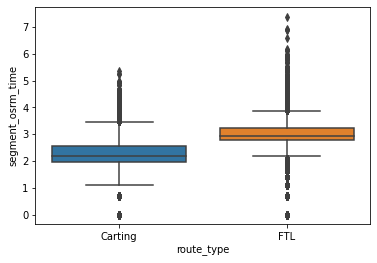

In [70]:
sns.boxplot(data['route_type'], np.log(data['segment_osrm_time']))
plt.show()

Median segment osrm time for FTL is significantly high as compared to Carting

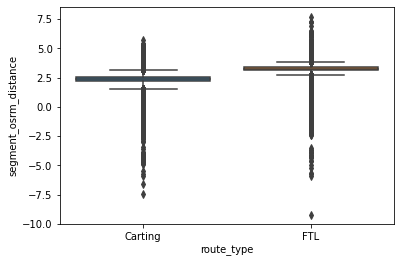

In [71]:
sns.boxplot(data['route_type'], np.log(data['segment_osrm_distance']))
plt.show()

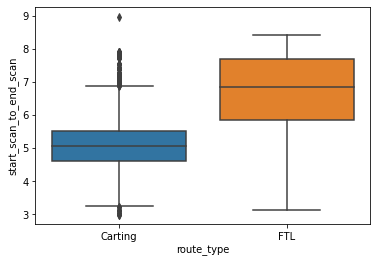

In [72]:
sns.boxplot(data['route_type'], np.log(data['start_scan_to_end_scan']))
plt.show()

Median of Time taken to deliver from source to destination for FTL is significantly high as compared to Carting

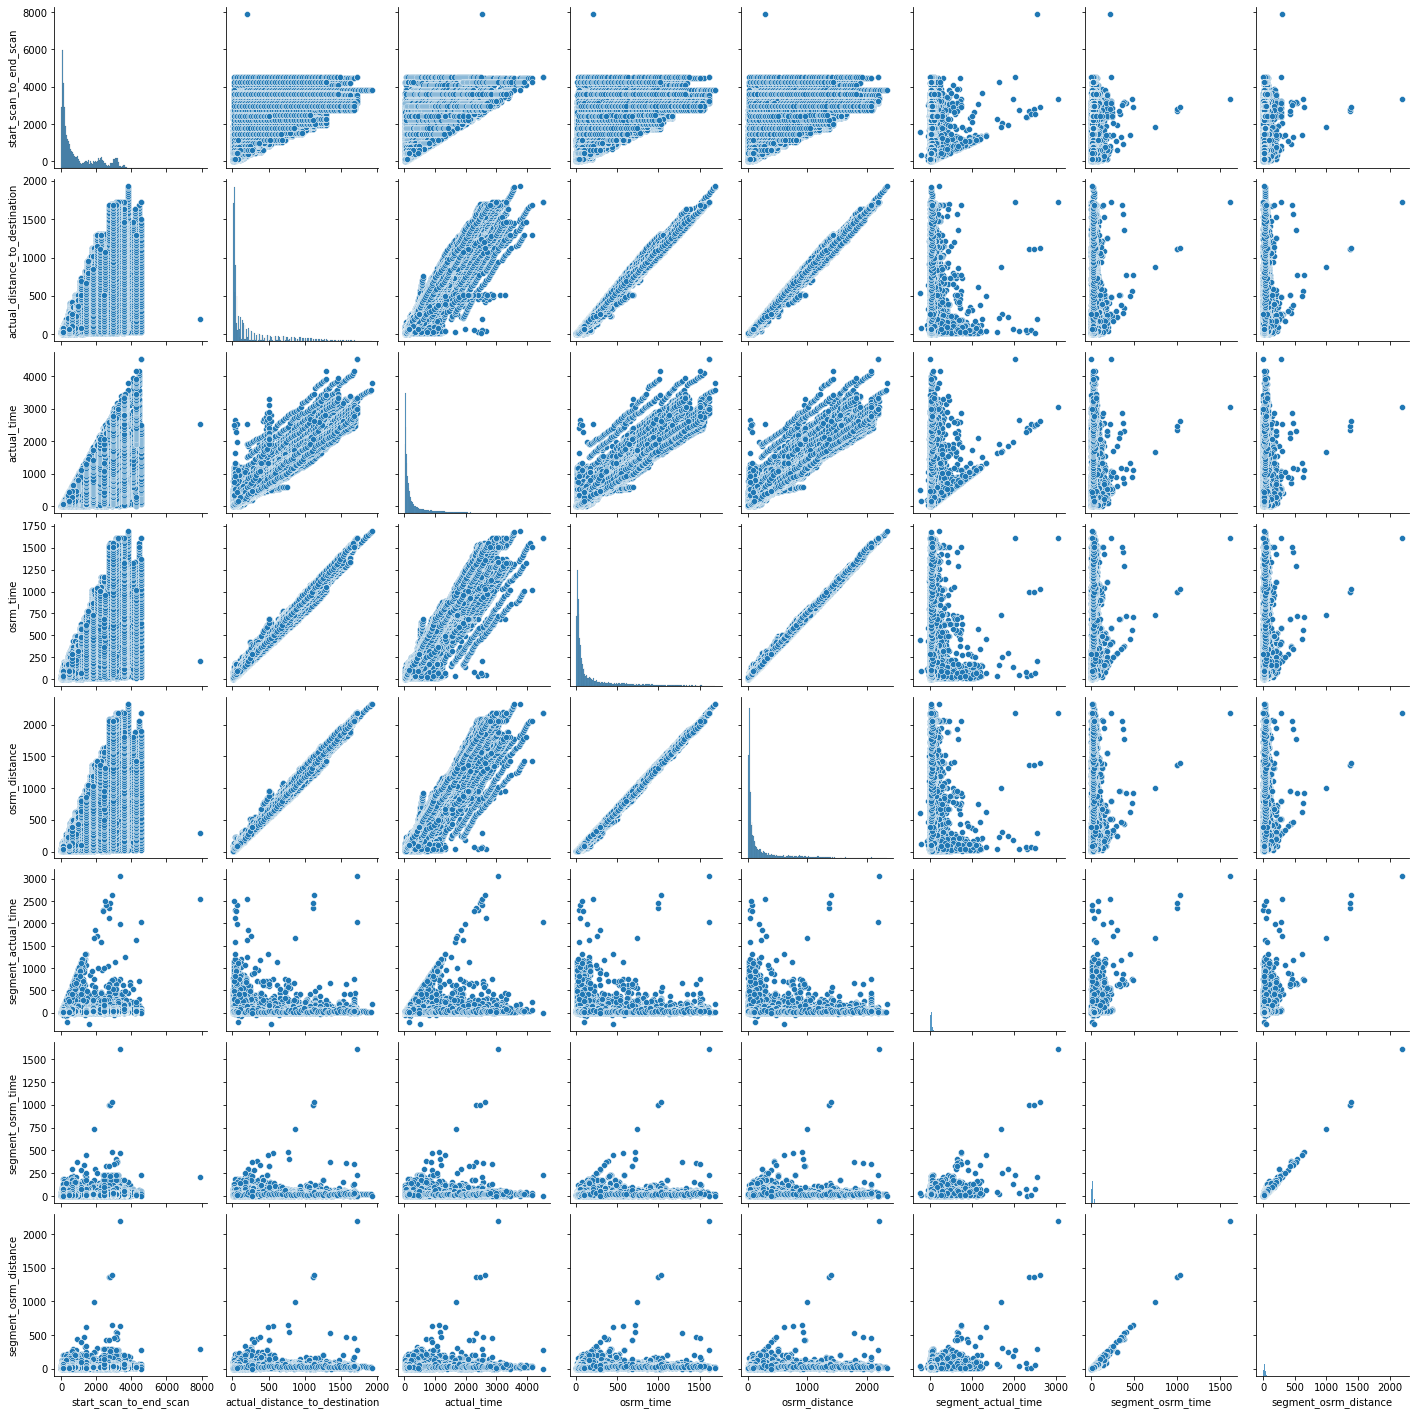

In [73]:
sns.pairplot(data)

- High correlation between distance and time.


# Build some features to prepare the data for actual analysis. 
### Destination Name

In [74]:
data[['city', 'center_state']] =data['destination_name'].str.split('_',n= 1,expand= True )
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,center_state
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D (Gujarat)
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D (Gujarat)
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D (Gujarat)


In [75]:
data[['centre', 'state']] = data['center_state'].str.split('(', n=1, expand=True)
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,center_state,centre,state
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D (Gujarat),MotvdDPP_D,Gujarat)
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D (Gujarat),MotvdDPP_D,Gujarat)
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D (Gujarat),MotvdDPP_D,Gujarat)


In [76]:
data['state'] = data['state'].str.rstrip(')')
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,center_state,centre,state
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D (Gujarat),MotvdDPP_D,Gujarat
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D (Gujarat),MotvdDPP_D,Gujarat
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D (Gujarat),MotvdDPP_D,Gujarat


In [77]:
data =  data.drop(['center_state'],axis= 1)
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,centre,state
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D,Gujarat
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D,Gujarat
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D,Gujarat


In [78]:
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,centre,state
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D,Gujarat
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D,Gujarat
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D,Gujarat


### Source Name

In [79]:
data[['city_source', 'rest_source']] = data['source_name'].str.split('_', n=1, expand= True)
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,centre,state,city_source,rest_source
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.0,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat)
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,20.0,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat)
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,28.0,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat)


In [80]:
data[['place_source', 'state_source']] =  data['rest_source'].str.split('(', n=1, expand=True)
data['state_source'] = data['state_source'].str.rstrip(')')
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,centre,state,city_source,rest_source,place_source,state_source
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,14.0,11.0,11.9653,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,10.0,9.0,9.7590,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,16.0,7.0,10.8152,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat


In [81]:
data.drop(['rest_source'], axis= 1)


,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,city,centre,state,city_source,place_source,state_source
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,11.9653,14.0,11.0,11.9653,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC,Gujarat
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,21.7243,10.0,9.0,9.7590,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC,Gujarat
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,32.5395,16.0,7.0,10.8152,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC,Gujarat
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,45.5620,21.0,12.0,13.0224,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC,Gujarat
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,54.2181,6.0,5.0,3.9153,Khambhat,MotvdDPP_D,Gujarat,Anand,VUNagar_DC,Gujarat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144862,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,67.9280,12.0,12.0,8.1858,Gurgaon,Bilaspur_HB,Haryana,Sonipat,Kundli_H,Haryana
144863,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,85.6829,26.0,21.0,17.3725,Gurgaon,Bilaspur_HB,Haryana,Sonipat,Kundli_H,Haryana
144864,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,97.0933,20.0,34.0,20.7053,Gurgaon,Bilaspur_HB,Haryana,Sonipat,Kundli_H,Haryana
144865,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,2018-09-20 23:32:09.618069,...,111.2709,17.0,27.0,18.8885,Gurgaon,Bilaspur_HB,Haryana,Sonipat,Kundli_H,Haryana


### Trip_creation_time

In [82]:
data['year_trip_creation'] =  data['trip_creation_time'].dt.year
data['month_trip_creation'] = data['trip_creation_time'].dt.month
data['day_trip_creation'] = data['trip_creation_time'].dt.day
data['week_trip_creation'] = data['trip_creation_time'].dt.week
data.head()

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,centre,state,city_source,rest_source,place_source,state_source,year_trip_creation,month_trip_creation,day_trip_creation,week_trip_creation
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38
3,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38
4,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,MotvdDPP_D,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38


# Feature Engineering
## Calculate the time taken between od_start_time and od_end_time

In [83]:
data['hour_time_difference'] = ((data['od_end_time'] - data['od_start_time']).dt.total_seconds()/60).round(2)
data.head(3)

,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,...,state,city_source,rest_source,place_source,state_source,year_trip_creation,month_trip_creation,day_trip_creation,week_trip_creation,hour_time_difference
0,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38,86.21
1,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38,86.21
2,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,2018-09-20 04:47:45.236797,...,Gujarat,Anand,VUNagar_DC (Gujarat),VUNagar_DC,Gujarat,2018,9,20,38,86.21


# Compare the difference between Point a. and start_scan_to_end_scan using Hypotesis testing.
### Hypothesis testing/ visual analysis to check if start_scan_to_end_scan and Hour_mean_difference calculated have same mean.
- Null Hypotesis, H0 : Mean for start_scan_to_end_scan = Mean for Hour_mean_difference.
- Alternate Hypotesis, H1 : There is a difference in start_scan_to_end_scan and Hour_mean_difference. Mean for start_scan_to_end_scan != Mean for Hour_mean_difference
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other.

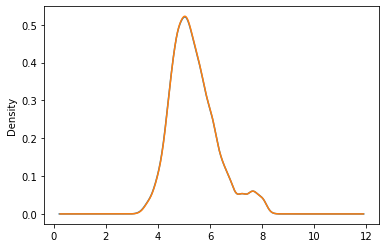

In [84]:
np.log(data.groupby(['trip_uuid'])['start_scan_to_end_scan'].mean()).plot(kind= 'kde')
np.log(data.groupby(['trip_uuid'])['hour_time_difference'].mean()).plot(kind= 'kde')
plt.show()

In [85]:
start_scan_to_end_scan =  np.log(data.groupby(['trip_uuid'])['start_scan_to_end_scan'].mean())

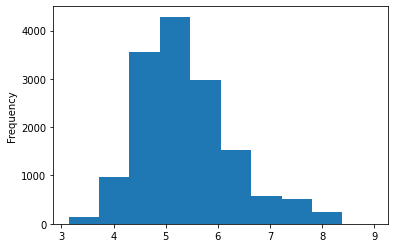

In [86]:
np.log(data.groupby(['trip_uuid'])['start_scan_to_end_scan'].mean()).plot(kind= 'hist')
plt.show()

In [87]:
hour_time_difference =  np.log(data.groupby(['trip_uuid'])['hour_time_difference'].mean())

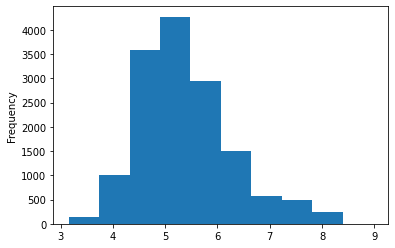

In [88]:
np.log(data.groupby(['trip_uuid'])['hour_time_difference'].mean()).plot(kind='hist')
plt.show()

####  QQ plots to compare the distribution of continuous variables with standard distributions.

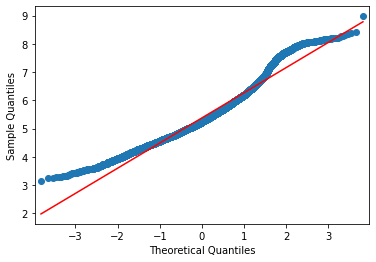

In [89]:
sm.qqplot(start_scan_to_end_scan, line = 's')
plt.show()

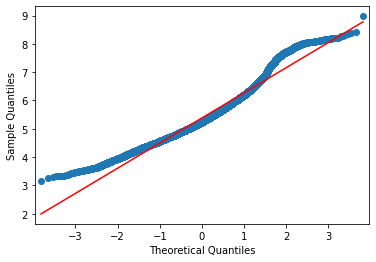

In [90]:
sm.qqplot(hour_time_difference, line = 's')
plt.show()

In [91]:
weightstats.ztest(start_scan_to_end_scan, hour_time_difference)

(-0.30754853738898336, 0.7584258844126381)

In [92]:
stats.ttest_ind(start_scan_to_end_scan, hour_time_difference)

Ttest_indResult(statistic=-0.30754853738898336, pvalue=0.7584280502302556)

- Significance Level(0.05) < pvalue.
- Since p-value is not less than significance level, we donot reject the Null Hypotesis(H0).
- We can conclude that there is no difference between start_scan_to_scan and hour_time_difference.

### Hypothesis testing/ visual analysis between actual_time aggregated value aggregated value and OSRM time aggregated value 
- Null Hypotesis, H0 : Mean for actual_time aggregated value = Mean for OSRM time aggregated value .
- Alternate Hypotesis, H1 : There is a difference in actual_time aggregated value and OSRM time aggregated value . Mean for actual_time aggregated value != Mean for OSRM time aggregated value 
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other.

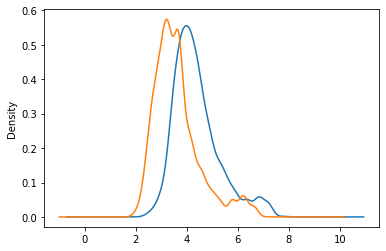

In [93]:
np.log(data.groupby(['trip_uuid'])['actual_time'].mean()).plot(kind= 'kde')
np.log(data.groupby(['trip_uuid'])['osrm_time'].mean()).plot(kind= 'kde')
plt.show()

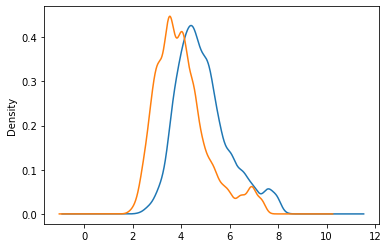

In [94]:
np.log(data.groupby(['trip_uuid'])['actual_time'].max()).plot(kind= 'kde')
np.log(data.groupby(['trip_uuid'])['osrm_time'].max()).plot(kind= 'kde')
plt.show()

In [95]:
actual_time = np.log(data.groupby(['trip_uuid'])['actual_time'].mean())
osrm_time = np.log(data.groupby(['trip_uuid'])['osrm_time'].mean())

####  QQ plots to compare the distribution of continuous variables with standard distributions.

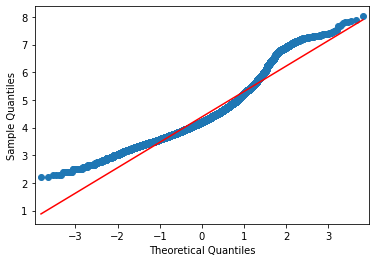

In [96]:
sm.qqplot(actual_time, line = 's')
plt.show()

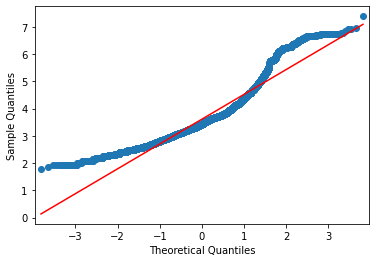

In [97]:
sm.qqplot(osrm_time, line = 's')
plt.show()

In [98]:
weightstats.ztest(actual_time, osrm_time)

(72.9233255478373, 0.0)

In [99]:
stats.ttest_ind(actual_time, osrm_time)

Ttest_indResult(statistic=72.9233255478373, pvalue=0.0)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that there is difference between actual_time and osrm_time.

### Hypothesis testing/ visual analysis between actual_time aggregated value aggregated value and segment actual time aggregated value
- Null Hypotesis, H0 : Mean for actual_time aggregated value = Mean for segment actual time aggregated value.
- Alternate Hypotesis, H1 : There is a difference in actual_time aggregated value and segment actual time aggregated value. Mean for actual_time aggregated value != Mean for segment actual time aggregated value
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other.

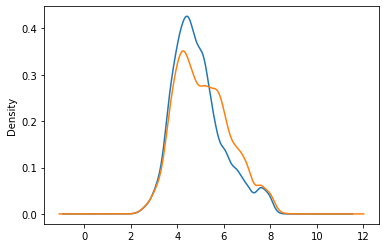

In [100]:
np.log(data.groupby(['trip_uuid'])['actual_time'].max()).plot(kind= 'kde')
np.log(data.groupby(['trip_uuid'])['segment_actual_time'].sum()).plot(kind= 'kde')
plt.show()

In [101]:
actual_time = np.log(data.groupby(['trip_uuid'])['actual_time'].max())
segmet_actual_time = np.log(data.groupby(['trip_uuid'])['segment_actual_time'].sum())

####  QQ plots to compare the distribution of continuous variables with standard distributions.

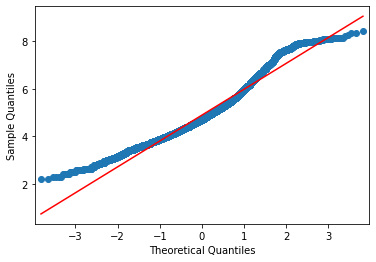

In [102]:
sm.qqplot(actual_time, line = 's')
plt.show()

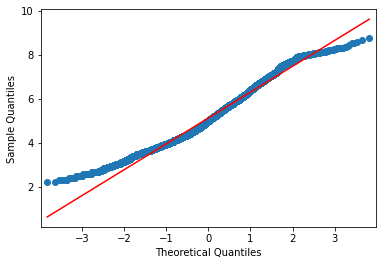

In [103]:
sm.qqplot(segmet_actual_time, line = 's')
plt.show()

In [104]:
weightstats.ztest(actual_time, segmet_actual_time)

(-16.835018565782516, 1.351460055960845e-63)

In [105]:
stats.ttest_ind(actual_time, segmet_actual_time)

Ttest_indResult(statistic=-16.835018565782516, pvalue=2.666341584365695e-63)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that there is difference between actual_time and segment actual time.

### Hypothesis testing/ visual analysis between  osrm distance aggregated value aggregated value and segment osrm distance aggregated value
- Null Hypotesis, H0 : Mean for  osrm distance aggregated value = Mean for segment osrm distance aggregated value.
- Alternate Hypotesis, H1 : There is a difference in  osrm distance aggregated value and segment osrm distance aggregated value. Mean for  osrm distance aggregated value != Mean for segment osrm distance aggregated value
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other.

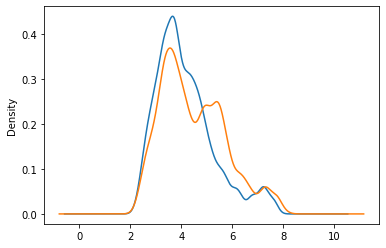

In [106]:
np.log(data.groupby(['trip_uuid'])['osrm_distance'].max()).plot(kind= 'kde')
np.log(data.groupby(['trip_uuid'])['segment_osrm_distance'].sum()).plot(kind= 'kde')
plt.show()

In [107]:
osrm_distance = np.log(data.groupby(['trip_uuid'])['osrm_distance'].max())
segmet_osrm_distance = np.log(data.groupby(['trip_uuid'])['segment_osrm_distance'].sum())

####  QQ plots to compare the distribution of continuous variables with standard distributions.

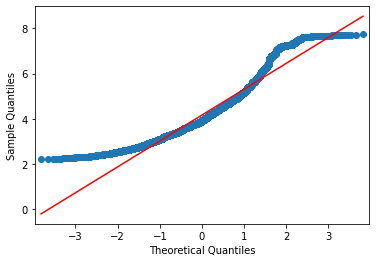

In [108]:
sm.qqplot(osrm_distance, line = 's')
plt.show()

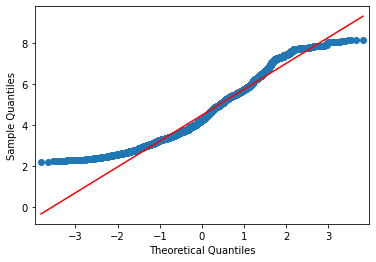

In [109]:
sm.qqplot(segmet_osrm_distance, line = 's')
plt.show()

In [110]:
weightstats.ztest(osrm_distance, segmet_osrm_distance)

(-23.1676047558836, 9.662671739556878e-119)

In [111]:
stats.ttest_ind(segmet_osrm_distance, osrm_distance)

Ttest_indResult(statistic=23.1676047558836, pvalue=1.0816495308045135e-117)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that there is difference between segment_osrm_distance and osrm_distance.

### Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value 
- Null Hypotesis, H0 : Mean for osrm time aggregated value = Mean for segment osrm time aggregated value .
- Alternate Hypotesis, H1 : There is a difference in osrm time aggregated value and segment osrm time aggregated value . Mean for osrm time aggregated value != Mean for segment osrm time aggregated value 
- Confindence Level = 95%
- significance level = 0.05
- Assumptions:  
1. Data is normaly distributed. 
2. Variance are equal. 
3. Two groups are independent of each other.

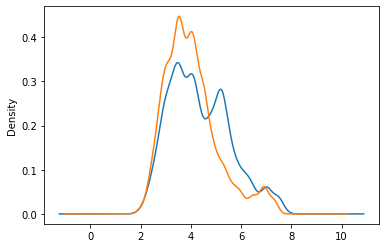

In [112]:
np.log(data.groupby(['trip_uuid'])['segment_osrm_time'].sum()).plot(kind= 'kde')
np.log(data.groupby(['trip_uuid'])['osrm_time'].max()).plot(kind= 'kde')
plt.show()

In [113]:
osrm_time = np.log(data.groupby(['trip_uuid'])['osrm_time'].max())
segment_osrm_time = np.log(data.groupby(['trip_uuid'])['segment_osrm_time'].sum())

####  QQ plots to compare the distribution of continuous variables with standard distributions.

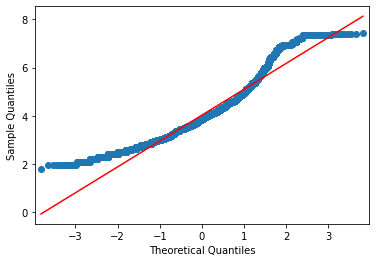

In [114]:
sm.qqplot(osrm_time, line = 's')
plt.show()

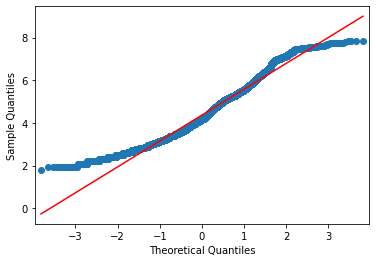

In [115]:
sm.qqplot(segment_osrm_time, line = 's')
plt.show()

In [116]:
weightstats.ztest(osrm_time, segment_osrm_time)

(-25.47194054730471, 4.034516552821789e-143)

In [117]:
stats.ttest_ind(segment_osrm_time, osrm_time)

Ttest_indResult(statistic=25.47194054730471, pvalue=1.3609435939023904e-141)

- Significance Level(0.05) > pvalue.
- Since p-value is less than significance level, we reject the Null Hypotesis(H0).
- We can conclude that there is difference between segment_osrm_time and osrm_time.

 # One-hot encoding on Route_type

In [118]:
data = pd.get_dummies(data, columns=['route_type'])
data =  data.drop('route_type_FTL', axis= 1)

# Check from where most orders are coming from (State, Corridor etc)

In [119]:
data.groupby(['state_source'])['trip_uuid'].count().sort_values(ascending=False)

state_source
Haryana                   27245
Maharashtra               20537
Karnataka                 19250
Tamil Nadu                 7317
Gujarat                    7169
Uttar Pradesh              7065
Telangana                  6476
West Bengal                5963
Andhra Pradesh             5497
Rajasthan                  5168
Punjab                     4678
Delhi                      4354
Bihar                      4123
Madhya Pradesh             3994
Assam                      2875
Jharkhand                  2597
Kerala                     2413
Orissa                     2094
Uttarakhand                 884
Himachal Pradesh            587
Chandigarh                  503
Goa                         502
Arunachal Pradesh           245
Chhattisgarh                229
Jammu & Kashmir             226
Meghalaya                    77
Pondicherry                  49
Nagaland                     40
Dadra and Nagar Haveli       30
Mizoram                      26
Tripura                    

In [120]:
data.groupby(['place_source'])['trip_uuid'].count().sort_values(ascending=False)

place_source
Bilaspur_HB     23267
Nelmngla_H       9975
Mankoli_HB       9088
Hub              5606
Tathawde_H       4061
                ...  
UttarDPP_D          1
Mirapati_L          1
NavdaCln_D          1
NadthiCx_D          1
Katghara_D          1
Name: trip_uuid, Length: 1207, dtype: int64

In [121]:
data.groupby(['city_source'])['trip_uuid'].count().sort_values(ascending=False)

city_source
Gurgaon       23585
Bangalore     10104
Bhiwandi       9088
Pune           4269
Bengaluru      4237
              ...  
Daurala           1
Shahjhnpur        1
Kayamkulam        1
Kasganj           1
Chikhli           1
Name: trip_uuid, Length: 1260, dtype: int64

- Haryana has the most order among states.
- Bilaspur_HB has the most order among corridors.
- Gurgaon has the most order among cities.

### Busiest corridor, avg distance between them, avg time taken

In [122]:
data.groupby(['place_source'])['actual_distance_to_destination'].mean().sort_values(ascending=False)

place_source
Nelmngla_L      870.118858
Bilaspur_HB     539.037216
Nelmngla_H      530.151781
RadhaCpx_D      494.524826
Central_H_2     480.096979
                   ...    
BjbNgr_DC         9.221260
Sec-83_DC         9.208772
Bomsndra_L        9.178345
Palam             9.143720
South_D_20        9.028852
Name: actual_distance_to_destination, Length: 1207, dtype: float64

In [123]:
data.groupby(['city_source'])['actual_distance_to_destination'].mean().sort_values(ascending=False)

city_source
Guwahati                           546.768717
Gurgaon                            532.088487
Bangalore                          523.773229
JhumriTlya                         494.524826
Purnia                             487.370870
                                      ...    
Mumbai Mahim (Maharashtra)           9.331623
Mumbai Antop Hill (Maharashtra)      9.301114
Jabalpur (Madhya Pradesh)            9.286647
Bhubaneswar                          9.244188
Vizag                                9.228686
Name: actual_distance_to_destination, Length: 1260, dtype: float64

In [124]:
data.groupby(['place_source'])['actual_time'].mean().sort_values(ascending=False)

place_source
Nelmngla_L      1489.641026
ColnyDPP_D      1133.600000
Bilaspur_HB      905.427859
Nelmngla_H       904.701855
RajpurRD_D       879.000000
                   ...     
CivilStn_D        17.318182
Lajpat_IP         16.615385
Uppal_Dc          16.250000
AmzonDev_V        16.207207
PhdofDPP_D        13.666667
Name: actual_time, Length: 1207, dtype: float64

In [125]:
data.groupby(['city_source'])['actual_time'].mean().sort_values(ascending=False)

city_source
Guwahati                      1251.548272
Helencha                      1133.600000
Gurgaon                        894.002078
Bangalore                      893.868270
Purnia                         881.300095
                                 ...     
Eral                            18.147059
Mumbai Mahim (Maharashtra)      18.000000
Virudhchlm                      17.821429
Angamaly                        17.318182
Nabarangpr                      13.666667
Name: actual_time, Length: 1260, dtype: float64

- Bilaspur_HB is the busiest corridor.
- Nelmnga_L has highest avg distance and time among corridors.
- Guwahati has highest avg distance and time among states.


# Standardize the numerical features using StandardScaler.

In [126]:
sc = StandardScaler()
cols = ['start_scan_to_end_scan','actual_distance_to_destination','actual_time', 'osrm_time',
 'osrm_distance', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'hour_time_difference']
data[cols] = sc.fit_transform(data[cols])

# Business Insights and Recommendations


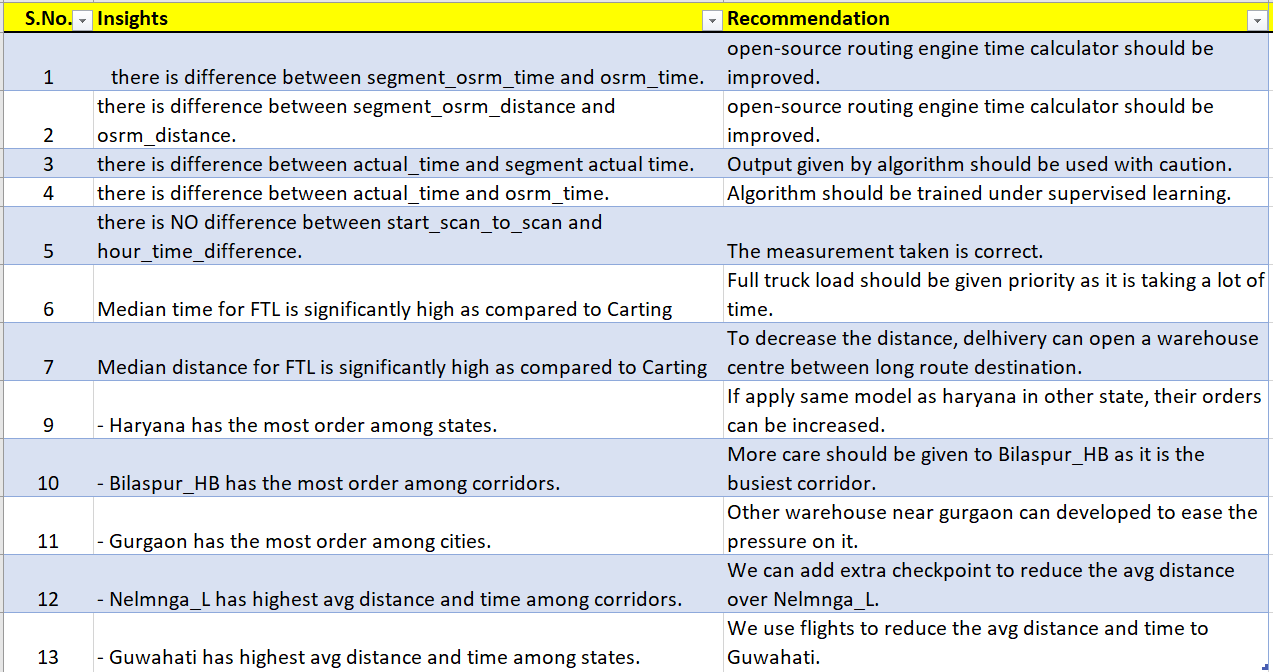